# PROJECT 2: WRANGLE AND ANALYZE DATA

## INTRODUCTION

* This project involves all the processes in data wrangling. From data gathering to data accessing and cleaning. In this project, tweet achive of twitter user also known as WeRateDogs will be used as the dataset for this project. Apart from data wrangling, some analysis and visualization will be applied to the cleaned dataset.


* The project will be starting with the first stage of data wrangling which is *DATA GATHERING*.

## DATA GATHERING

* In this stage, we will be gathering all the datasets needed to complete this project.

* Before that is done, we will start by importing some python libraries needed for the project.

In [13]:
# install the tweepy package
!pip install tweepy

In [14]:
#import python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy 
import json

** Read the first dataset which is in a CSV format 'twitter_archive_enhanced.csv' using pandas.

In [15]:
#Reading the csv dataset with pandas
df_archive = pd.read_csv('twitter_archive_enhanced.csv')

In [16]:
#Testing to see if our dataset has been imported using the head function.
#Note that this is a visual assesment of the dataset

df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
df_archive.shape

(2356, 17)

** Download the second dataset 'image_predictions.tsv' with the url using the request library.

In [18]:
# downloading the image_prediction.tsv programmatically

# define the url and use request.get method
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file = requests.get(url)

# write the request's response to a file
with open('image_predictions.tsv', 'wb') as f:
    f.write(file.content)

In [19]:
# read the image_prediction tsv file with pandas
df_image = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
df_image.shape

(2075, 12)

** Writing and Reading twitter JSON without Twitter Account

In [21]:
#readjson data and store in a list 
with open('tweet_json.txt', 'r') as json_file: 
    file = []  # Declaring Empty Dataframe to store json file 
    
    for line in json_file:
        lines = line.replace('\n', '')
        file.append(lines)
        
#Counting the length of the file    
line_length = len(file)   

# Declaring Empty Dataframe to store tweet_id,retweet_count,favourite_count
tweet_id = []
retweet_count = []
favourite_count = []
tweet_date = []

#Store the selected columns in a dictionary
data = {'tweet_id': [], 'retweet_count':[], 'favorite_count':[]}

#For Loop to iterate in the line length 
for i in range(line_length):
    dictionary = json.loads(file[i])
    tweet_id.append(dictionary['id'])
    retweet_count.append(dictionary['retweet_count'])
    favourite_count.append(dictionary['favorite_count'])

#Dictionaries to dataframe
data.update({'tweet_id':tweet_id, 'retweet_count': retweet_count, 'favorite_count' : favourite_count})
df_tweet = pd.DataFrame(data)
df_tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [22]:
df_tweet.shape

(2354, 3)

In [23]:
# converting to csv
df_tweet.to_csv('df_tweet.csv', index = False)

## ACCESSING THE DATA

* In this stage, we check for the ttidiness and quality of the data visually and programmatically.

* This process will be documented at every stage. 

* The accessment will start from the first dataset gathered.

### twitter_archive_enhanced dataset

In [24]:
#visually accessing the twitter_archive_enhanced dataset
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [25]:
#programmatically accessing the twitter_archive_enhanced dataset
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [26]:
#checking the statistical distribution of the numeric variables
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [27]:
#checking the value_counts of the dog name 
df_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [28]:
#checking for duolicates in the archive dataset
sum(df_archive.duplicated())

0

In [29]:
#checking the value_counts of the dog rating_denominator
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [30]:
#checking the value_counts of the dog rating_numerator
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

### TIDINESS ISSUES

** Doggo, floofer, pupper and puppo should be in one column

** Timestamp should be separated into two different columns (Date and time)

### QUALITY ISSUES

** Invalid Dog names

** Invalid or outlier in the  rating_numerator column

** Invalid or outlier in the rating_denominator column

** wrong datatype for timestamp

** wrong datatype for tweet_id

** Drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp



## image_prediction dataset

In [31]:
#visually accessing the image_prediction dataset
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [32]:
#programmatically accessing the image_predicton dataset
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
# Statistically accessing the image_prediction dataset
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [34]:
sum(df_image.jpg_url.duplicated())

66


### Quality

** Conver tweet_id to string (object)

** Duplicate images in jpg_url column

** Inconsistency in the dog breed names, some are in capital while others are in lower letters.

## twitter_json dataset

In [35]:
# visually accessing the twitter_json dataset
df_tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [36]:
# Programmatically accessing the twitter_json dataset
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [37]:
# Statistically accessing the twitter_json dataset
df_tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Tidiness

** Merge the cleaned version of the three datasets into one master dataset.


## OVER ALL ACCESSMENT ISSUES

### TIDINESS

** Doggo, floofer, pupper and puppo should be in one column

** Timestamp should be separated into two different columns (Date and time)

** Merge the three datasets into one master dataset.


### QUALITY

** Invalid Dog names

** Invalid or outlier in the  rating_numerator column

** Invalid or outlier in the rating_denominator column

** wrong datatype for timestamp

** Convert tweet_id to string (object)

** Duplicate images in jpg_url column

** Inconsistency in the dog breed names, some are in capital while others are in lower letters.

** Drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp


# DATA CLEANING

> In this stage, the issues identified from accessing the data will be cleaned. This would be done by defining, coding and testing the result of the cleaning process.

> Before starting the cleaning, we will make a copy of each of the original dataset

In [38]:
# making a copy of each of the original datasets
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_tweet_clean = df_tweet.copy()

> Next, is to start cleaning all the issues identified from accessing the data.

### ISSUE 1

> Merge the three datasets into one master dataset.

### DEFINE

> Merge df_archive_clean, df_image_clean, df_tweet_clean into a single dataset as df_archive_master using the merge function.

### CODE

In [39]:
#import library
from functools import reduce

#define list of DataFrames
dfs = [df_archive_clean, df_image_clean, df_tweet_clean]

#merge all DataFrames into one
df_archive_master = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id'], how = 'outer'), dfs)

### TEST

In [40]:
df_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### ISSUE 2

> wrong datatype for timestamp


### DEFINE

> Change timestamp from object to datetime

### CODE

In [41]:
#timestamp from object to datetime
df_archive_master['timestamp'] = pd.to_datetime(df_archive_master.timestamp)


### TEST

In [42]:
#test the dataframe for update
df_archive_master.timestamp.info()

<class 'pandas.core.series.Series'>
Int64Index: 2356 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2356 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 36.8 KB


### ISSUE 3

> Timestamp should be separated into two different columns (Date and time)

### DEFINE

> Create two different columns for timestamp (Date and time column)

### CODE

In [43]:
#creating the date column from timestamp
df_archive_master['date'] = df_archive_master['timestamp'].dt.date

#creating the time column from timestamp
df_archive_master['time'] = df_archive_master['timestamp'].dt.time

#dropping the timestamp column
df_archive_master.drop('timestamp', axis =1, inplace = True)

### TEST

In [44]:
#checking the updated dataframe
df_archive_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,date,time
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0,2017-08-01,16:23:56
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0,2017-08-01,00:17:27
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,2017-07-31,00:18:03
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0,2017-07-30,15:58:51
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,2017-07-29,16:00:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,...,Rottweiler,0.243682,True,Doberman,0.154629,True,41.0,111.0,2015-11-16,00:24:50
2352,666044226329800704,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,147.0,311.0,2015-11-16,00:04:52
2353,666033412701032449,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,...,malinois,0.138584,True,bloodhound,0.116197,True,47.0,128.0,2015-11-15,23:21:54
2354,666029285002620928,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,...,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,48.0,132.0,2015-11-15,23:05:30


### ISSUE 4

> Doggo, floofer, pupper and puppo should be in one column

### DEFINE

> Extract doggo, puppo, pupper, flooter from their various columns into the new dog_type colunn

### CODE

In [45]:
# Extract doggo, puppo, pupper, floofer from their various columns into the new dog_category column
df_archive_master['dog_category'] = df_archive_master['text'].str.extract('(doggo|floofer|pupper|puppo)')

df_archive_master.drop(columns= ['doggo', 'pupper', 'floofer', 'puppo'], axis=1, inplace = True)

### TEST

In [46]:
#code test
df_archive_master


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,date,time,dog_category
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,0.085851,False,banana,0.076110,False,8853.0,39467.0,2017-08-01,16:23:56,NaN
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,0.090647,True,papillon,0.068957,True,6514.0,33819.0,2017-08-01,00:17:27,NaN
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,2017-07-31,00:18:03,NaN
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,0.168086,True,spatula,0.040836,False,8964.0,42908.0,2017-07-30,15:58:51,NaN
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,...,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,2017-07-29,16:00:24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,...,0.243682,True,Doberman,0.154629,True,41.0,111.0,2015-11-16,00:24:50,NaN
2352,666044226329800704,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,...,0.360687,True,miniature_pinscher,0.222752,True,147.0,311.0,2015-11-16,00:04:52,NaN
2353,666033412701032449,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,...,0.138584,True,bloodhound,0.116197,True,47.0,128.0,2015-11-15,23:21:54,NaN
2354,666029285002620928,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,...,0.074192,True,Rhodesian_ridgeback,0.072010,True,48.0,132.0,2015-11-15,23:05:30,NaN


### ISSUE 5

> Invalid and non standard Dog names

### DEFINE

> Rename invalid and non standard names to Nan

### CODE

In [47]:
#creating an invalid_names variable.
invalid_names = []

# Loop to find ordinary word.
for index in df_archive_master.name:
    # check name starting with lowercase.
    if index.islower():
        # If yes will append to non_names.
        invalid_names.append(index)

# list will filter only unique values
invalid_names = list(set(invalid_names))

# Printing invalid and non standard names.
invalid_names

['mad',
 'actually',
 'his',
 'quite',
 'the',
 'unacceptable',
 'all',
 'one',
 'infuriating',
 'a',
 'very',
 'this',
 'light',
 'officially',
 'space',
 'life',
 'old',
 'my',
 'by',
 'an',
 'getting',
 'incredibly',
 'not',
 'such',
 'just']

In [48]:
# Loop to replace each non standard name (invalid_name).
for index in invalid_names:
    df_archive_master.name.replace(index,
                              "None",
                              inplace = True)

### TEST

In [49]:
# Based on the list of non-standard names. Let's ensure if all have been removed.
sum(df_archive_master.name.isin(invalid_names))

0

### ISSUE 6

>  Convert tweet_id to string (object)

### DEFINE

> Convert tweet_id datatype from int to object

### CODE

In [50]:
#convert tweet_id from object to string
df_archive_master['tweet_id']= df_archive_master['tweet_id'].astype(str)

### TEST

In [51]:
#code test
df_archive_master.tweet_id.info()

<class 'pandas.core.series.Series'>
Int64Index: 2356 entries, 0 to 2355
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2356 non-null   object
dtypes: object(1)
memory usage: 36.8+ KB


### ISSUE 7

>Duplicate images in jpg_url column

### DEFINE
> Remove all duplicates in jpg_url

### CODE

In [52]:
#remove duplicates
df_archive_master.drop_duplicates(subset=['jpg_url'], keep=False, inplace=True)

### TEST

In [53]:
#code test
sum(df_archive_master.jpg_url.duplicated())

0

### ISSUE 8

>Drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp

### DEFINE

> Drop  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp

### CODE

In [54]:
#Drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp
df_archive_master.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 
                     'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace = True) 

### TEST

In [55]:
#test code
df_archive_master.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweet_count', 'favorite_count', 'date', 'time', 'dog_category'],
      dtype='object')

### ISSUE 9

> Inconsistency in the dog breed names, some are in capital while others are in lower letters.

### DEFINE
> Standardization of the dogs' breeds names in P1, P2 and P3 columns.

### CODE
    

In [56]:
def fix_names(list_names):
    # Convert any uppercase in lowercase.
    list_names = list(map(lambda x : x.lower(), list_names ))
    # Change spaces in underscores.
    list_names = list(map(lambda x : x.replace(' ','_'), list_names ))
    # Change dash to underscores.
    list_names = list(map(lambda x : x.replace('-','_'), list_names ))
    return list_names

In [57]:
df_archive_master.p1 = fix_names(df_archive_master.p1)
df_archive_master.p2 = fix_names(df_archive_master.p2)
df_archive_master.p3 = fix_names(df_archive_master.p3)

### TEST

In [58]:
# Subsetting the df_archive_master to show only p1, p2, p3, and tweet_id.
df_archive_master[['tweet_id','p1','p2','p3']].head()

,tweet_id,p1,p2,p3
0,892420643555336193,orange,bagel,banana
1,892177421306343426,chihuahua,pekinese,papillon
2,891815181378084864,chihuahua,malamute,kelpie
3,891689557279858688,paper_towel,labrador_retriever,spatula
4,891327558926688256,basset,english_springer,german_short_haired_pointer


### ISSUE 10 AND 11
> Invalid or outlier in the rating_denominator column

>  Invalid or outlier in the rating_denominator column


### DEFINE
>  Remove denominator ratings that are not equal to 10

>  Remove numerator ratings greater than 15

### CODE

In [59]:
#remove denominator ratings that are not equal to 10 and numerator ratings that are greater than 15
df_archive_master = df_archive_master[~((df_archive_master.rating_denominator != 10) | (df_archive_master.rating_numerator > 15))]

### TEST

In [60]:
#code test
df_archive_master[(df_archive_master.rating_denominator != 10) | (df_archive_master.rating_numerator > 15)]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,date,time,dog_category


# DATA STORING

> After cleaning the issues accessed, the next stage is to store the cleaned master dataset to CSV.

In [61]:
df_archive_master.to_csv('twitter_archive_master.csv', index = False, encoding='utf-8')

# ANALYZING AND VISUALIZING DATA

In [62]:
df = pd.read_csv('twitter_archive_master.csv')

df.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,date,time,dog_category
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,...,0.085851,False,banana,0.076110,False,8853.0,39467.0,2017-08-01,16:23:56,NaN
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,...,0.090647,True,papillon,0.068957,True,6514.0,33819.0,2017-08-01,00:17:27,NaN
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,...,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,2017-07-31,00:18:03,NaN
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,...,0.168086,True,spatula,0.040836,False,8964.0,42908.0,2017-07-30,15:58:51,NaN
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,...,0.225770,True,german_short_haired_pointer,0.175219,True,9774.0,41048.0,2017-07-29,16:00:24,NaN


### INSIGHTFUL QUESTIONS

1. How many categories of dogs are in the dataset and value

2. Identifying relationship or correlation between retweet count and favorite count

3. Dog category with the most favorite count


### QUESTION 1
. 1. How many categories of dogs are in the dataset and value


In [63]:
df['dog_category'].value_counts()


pupper     214
doggo       68
puppo       27
floofer      3
Name: dog_category, dtype: int64

> The dataset contains 4 unique category or types of dog. 

### QUESTION 2

2. Identifying relationship between retweet count and favorite count

C:\Users\fuk00005\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


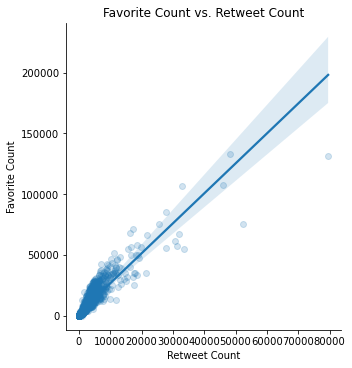

In [64]:
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=df,
           size = 5,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');

> There is a positive relationship between retweet count and favorite count as shown in the plot

### QUESTION 3
3. Dog category against favorite count

<AxesSubplot:title={'center':'Dog Category by Favorite count'}, xlabel='Dog Category', ylabel='Favorite Count (In millions)'>

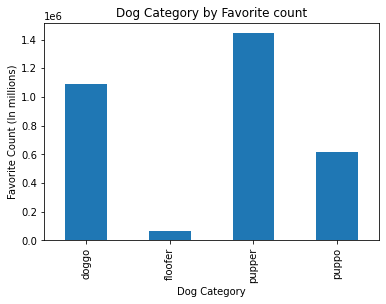

In [65]:
# plotting dog category w
df.groupby(['dog_category'])['favorite_count'].sum().plot(kind = 'bar', xlabel = 'Dog Category', 
                                                          ylabel= 'Favorite Count (In millions)',
                                                          title = 'Dog Category by Favorite count')


> From the visualization, it is shown that the doggo category of dog had the most favourite count.